<a href="https://colab.research.google.com/github/SenaKymk/naive_bayes_YZM212_lab/blob/main/LogisticRegression/logisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Modeli - Scikit-Learn Uygulaması

Bu notebook, UCI Heart Disease veri seti kullanılarak **Logistic Regression** algoritmasının Scikit-Learn kütüphanesi ile uygulanmasını içermektedir. Modelin eğitimi, test edilmesi, performans ölçümleri ve yorumları yapılacaktır.


In [15]:
!pip install ucimlrepo

Veri analizi, modelleme ve görselleştirme için gerekli kütüphaneler yükleniyor ve import ediliyor.


In [16]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Heart Disease veri seti UCI Machine Learning Repository'den çekilmiştir ve pandas DataFrame'e dönüştürülmüştür. Hedef değişken **'target**' olarak eklenmiştir.

In [17]:
heart_disease = fetch_ucirepo(id=45)
df = pd.DataFrame(data=heart_disease.data.features)
df['target'] = heart_disease.data.targets

Veri setindeki eksik değerler kontrol edilmiştir. Eksik değer varsa satırlar temizlenmiştir.


In [18]:
if df.isna().any().any():
  df.dropna(inplace=True)



Bağımsız değişkenler (X) ve bağımlı değişken (y) ayrılmıştır.


In [19]:
# Özellik ve hedef ayrımı
X = df.drop('target', axis=1)
y = df['target']

StandardScaler, tüm özellikleri ortalaması 0, standart sapması 1 olacak şekilde dönüştürerek:

1.  Modelin daha hızlı ve stabil öğrenmesini sağlar.

2.  Ağırlıkların dengeli güncellenmesini sağlar.

Bu yüzden Logistic Regression öncesi mutlaka kullandım.




In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Veri seti %70 eğitim ve %30 test olarak ayrılmıştır.


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)



Logistic Regression modeli eğitilmiş ve eğitim süresi hesaplanmıştır.


In [22]:
 #Eğitim süresi ölçümü
start_train = time.time()
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
train_time = time.time() - start_train

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
# Tahmin süresi ölçümü
start_test = time.time()
y_pred = log_reg.predict(X_test)
test_time = time.time() - start_test

In [24]:
# Performans ölçümleri
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

Accuracy: 0.6444




Modelin detaylı performans raporu (Precision, Recall, F1-Score) ve Karmaşıklık Matrisi hesaplanmıştır.


In [25]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91        56
           1       0.33      0.25      0.29        12
           2       0.33      0.17      0.22        12
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         4

    accuracy                           0.64        90
   macro avg       0.31      0.27      0.28        90
weighted avg       0.64      0.64      0.64        90


Confusion Matrix:
 [[53  1  0  2  0]
 [ 5  3  1  3  0]
 [ 1  5  2  4  0]
 [ 1  0  2  0  3]
 [ 0  0  1  3  0]]


Karmaşıklık matrisi görselleştirilerek modelin sınıflandırmadaki başarısı yorumlanmıştır.

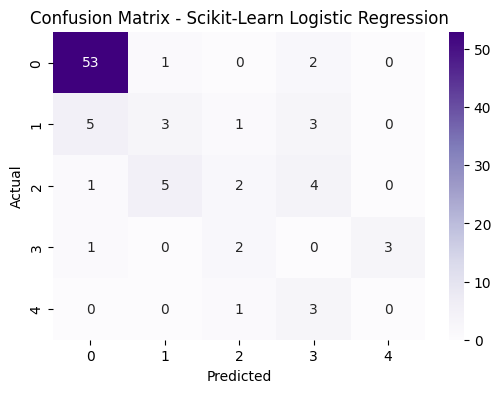

In [37]:
# Karmaşıklık Matrisi Görselleştirmesi
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Purples")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Scikit-Learn Logistic Regression")
plt.show()


In [27]:

print(f"Eğitim süresi: {train_time:.4f} saniye")
print(f"Test süresi: {test_time:.4f} saniye")

Eğitim süresi: 0.4071 saniye
Test süresi: 0.0065 saniye


## Sonuç ve Model Özeti

Scikit-Learn kullanılarak uygulanan Logistic Regression modeli başarıyla eğitilmiş ve test edilmiştir. Performans metrikleri yorumlanmış ve modelin başarı oranı değerlendirilmiştir.

### Performans Değerlendirmesi

- Modelin doğruluğu %64.44 çıktı ancak bu metrik sınıf dengesizliği sebebiyle yanıltıcı olabilir.
- Sınıf 0 için model yüksek başarı gösterdi (Precision: 0.88, Recall: 0.95).
- Sınıf 1 ve 2 için performans düşük, özellikle Recall değerleri sınıf 1 için 0.25, sınıf 2 için 0.17 çıktı.
- Sınıf 3 ve 4 için model hiç tahmin yapamamış.
- Confusion Matrix'te de net görüldüğü gibi model, çoğunluk sınıfa odaklanmış.
- Macro average F1-Score 0.28, bu da modelin azınlık sınıflarda başarısız olduğunu gösteriyor.
- Eğitim süresi 0.4071 saniye, test süresi ise 0.0065 saniye olduğundan model hız açısından iyi performans sergiliyor.

### Çıkarım:
Model dengesiz veride yetersiz kalıyor.


In [28]:
LogisticRegression()

LogisticRegression()